In [1]:
# IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt

<h3>Forward propagation</h3>

<p>Let us introduce the concept with an example with $L = 2$ hidden layers.  The input layer is $A0 = X$ and the output layer is $B = A3$.  The hidden layers are $A1$ and $A2$.  We say that this net has $C = 3$ connections.  There are three weight matricies $W10$, $W21$, and $W32$.  There are three bias vectors $b1$, $b2$, and $b3$.</p>

\begin{split}
Z1_{mn} &= \sum_{i=1}^{M0} W10_{mi} A0_{in} + b1_m \\
A1_{mn} &= g1(Z1_{mn}) \\
\\
Z2_{mn} &= \sum_{i=1}^{M1} W21_{mi} A1_{in} + b2_m \\
A2_{mn} &= g2(Z2_{mn}) \\
\\
Z3_{mn} &= \sum_{i=1}^{M2} W32_{mi} A2_{in} + b3_m \\
A3_{mn} &= g3(Z3_{mn}) \\
\end{split}

<p>Let us vectorize and simplify notation.  The center dot is a matrix product.</p>

\begin{split}
\underbrace{Z1}_{M1 \times N}
&= \underbrace{W10}_{M1 \times M0} \cdot \underbrace{A0}_{M0 \times N}
+ \underbrace{b1}_{M1 \times 1} \cdot \underbrace{1}_{1 \times N} \\
\underbrace{A1}_{M1 \times N}
&= g1(\underbrace{Z1}_{M1 \times N}) \\
\\
\underbrace{Z2}_{M2 \times N}
&= \underbrace{W21}_{M2 \times M1} \cdot \underbrace{A1}_{M1 \times N}
+ \underbrace{b2}_{M2 \times 1}  \cdot \underbrace{1}_{1 \times N} \\
\underbrace{A2}_{M2 \times N}
&= g2(\underbrace{Z2}_{M2 \times N}) \\
\\
\underbrace{Z3}_{M3 \times N}
&= \underbrace{W32}_{M3 \times M2} \cdot \underbrace{A2}_{M2 \times N}
+ \underbrace{b3}_{M3 \times 1}  \cdot \underbrace{1}_{1 \times N} \\
\underbrace{A3}_{M3 \times N}
&= g3(\underbrace{Z3}_{M3 \times N}) \\
\end{split}


In [2]:
# matrixes are stored in lists
# for C = 3
# W = [W10, W21, W32]
# b = [b1, b2, b3]
def init_weights(C, M):
    W = [0]*C
    b = [0]*C

    for c in range(C):
        W[c] = np.random.randn(M[c + 1], M[c])*0.01
        b[c] = np.zeros([M[c + 1], 1])
    return W, b
    

# propagate forward
def prop_forward(C, g, X, W, b):
    A = [X] + [0]*C
    Z = [0]*C

    for c in range(C):
        Z[c] = np.dot(W[c], A[c]) + b[c]
        A[c + 1] = g[c](Z[c])
    return A, Z

<h3>Propagation functions</h3>
These functions can take a matrix arguement where the function is applied to each element.
The derivative of each function is defined for use with backpropagation.

<h4>Sigmoid</h4>
This is a popular functon to use with neural nets.  It's non-linear and has on/off properties like a neuron.

\begin{split}
\sigma(Z) &= \frac{1}{1 + e^{-Z}} \\
\frac{\partial \sigma(Z)}{\partial Z}
&= \frac{e^{-Z}}{(1 + e^{-Z})^2} \\
&= \sigma(Z)(1 - \sigma(Z))
\end{split}


<h4>Hyperbolic tanh</h4>

This is very much like the sigmoid function but centered around zero.
Andrew Ng has suggests using this instead of the sigmoid function.
One can show that they're basically the same functions with translations and scalings.

\begin{split}
\tanh(Z) &= \frac{\sinh(Z)}{\cosh(Z)} \\
&= \frac{e^{Z} - e^{-Z}}{e^{Z} + e^{-Z}}
 = \frac{1 - e^{-2 Z}}{1 + e^{-2 Z}}
 = \frac{2 - 1 - e^{-2 Z}}{1 + e^{-2 Z}} \\
&= 2 \sigma(2 Z) - 1 \\
\frac{\partial \tanh(Z)}{\partial Z}
&= \frac{\cosh^2(Z) - \sinh^2(z)}{\cosh^2(Z)} \\
&= 1 - \tanh^2(Z)
\end{split}

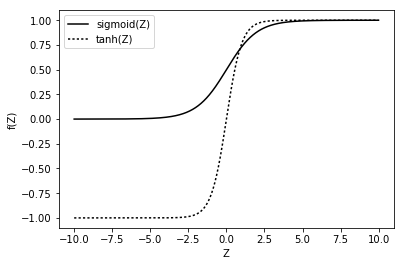

In [3]:
# sigmoid function
def sig(Z): return 1/(1 + np.exp(-Z))
def dsig(Z): return sig(Z)*(1 - sig(Z))


# hyperbolic tan function
def tanh(Z): return np.tanh(Z)
def dtanh(Z): return 1 - tanh(Z)**2


# let's see what these functions looks like
Z = np.arange(-10.0, 10.0, 0.01)
plt.plot(Z, sig(Z), 'k', label='sigmoid(Z)')
plt.plot(Z, tanh(Z), 'k:', label='tanh(Z)')
plt.legend(loc='upper left')
plt.xlabel('Z')
plt.ylabel('f(Z)')
plt.show()

<h4>Soft max</h4>

\begin{split}
s(Z_{mn}) &= \frac{\exp(Z_{mn})}{\sum_{i = 1}^M \exp(Z_{in})} \\
\frac{\partial s(Z_{mn})}{\partial Z_{mn}}
&= \frac{\partial}{\partial Z_{mn}} \frac{\exp(Z_{mn})}{\sum_{i = 1}^M \exp(Z_{in})} \\
&= \frac{\exp(Z_{mn})}{\sum_{i = 1}^M \exp(Z_{in})}
 - \frac{\exp(Z_{mn})\sum_{i = 1}^M \exp(Z_{in})\delta_{im}}{\left(\sum_{i = 1}^M \exp(Z_{in})\right)^2} \\
&= \frac{\exp(Z_{mn})}{\sum_{i = 1}^M \exp(Z_{in})}
 - \frac{\exp(Z_{mn})\exp(Z_{mn})}{\left(\sum_{i = 1}^M \exp(Z_{in})\right)^2} \\
&= s(Z_{mn})(1 - s(Z_{mn}))
\end{split}

In [4]:
# soft max
def soft_max(Z):
    temp = np.exp(Z)
    return temp / np.sum(temp, axis=0, keepdims=True)

def dsoft_max(Z):
    temp = soft_max(Z)
    return temp*(1 - temp)

<h4>Forward propagation and linear function</h4>

<p>Let us see what happends if the second layer's function is linear.  That is, $g2(Z2_{mn}) = \omega Z2_{mn} + \beta$.  One can show</p>

\begin{split}
Z1_{mn} &= \sum_{i=1}^{M0} W10_{mi} A0_{in} + b1_m \\
A1_{mn} &= g1(Z1_{mn}) \\
\\
Z3_{mn} &= \sum_{i=1}^{M1} W31'_{mi} A1_{in} + b3'_m \\
A3_{mn} &= g3(Z3_{mn}) \\
\end{split}

where

\begin{split}
W31'_{mm'} &= \sum_{i=1}^{M2} \omega W32_{mi}W21_{im'} \\
b3'_m &= \sum_{i=1}^{M2} \omega W32_{mi} b2_{i} + \sum_{i=1}^{M2} \beta W32_{mi} + b3_m \\
\end{split}

We see that the second and third layers have collapsed into a single layer.  Hence, using linear functions is not a useful thing to do.


<h3>The cost function</h3>

<p>This is the error function or the cost function.</p>

\begin{gather}
J = \frac{1}{N} \sum_{i}^{M3} \sum_{j}^N F(Y_{ij}, A3_{ij})
\end{gather}

In [5]:
# calculate cost
def calc_cost(F, Y, B, N):
    J = np.sum(F(Y, B))/N
    return J

In [6]:
# DEFINE MORE MATH FUNCTIONS


# log probability
# this function will be used to calculate cost and will involeve a sum
# it's used instead of the square quadratic fuction popular in the past
# because it's convex
# note it's a function of two variables and the deriavative is with respect to B
def log_prob(Y, B): return -(Y*np.log(B) + (1 - Y)*np.log(1 - B))
def dlog_prob(Y, B): return -(Y/B - (1 - Y)/(1 - B))


def cross_entropy(Y, B): return -Y*np.log(B)
def dcross_entropy(Y, B): return -Y/B


def quad(Y, B): return (B - Y)**2/2
def dquad(Y, B): return (B - Y)


# normalize each row such that the mean is zero and
# the standard deviation is one
# this is a preprocessing routine
# (note that I have not used this function)
def define_normalize(X):
    means = np.mean(X, axis=1, keepdims=True)
    stds = np.std(X, axis=1, keepdims=True)
    def normalize_data(X):
        return (X - means)/stds
    return normalize_data

<h3>Back propagation</h3>

<h4>Layer gradients</h4>

There are two steps.  First calculate cost gradients.  The first three equations are derived in Appendix A, B, and C.  There remaining equations following similarly.

\begin{split}
\frac{\partial J}{\partial A3_{mn}}
&= \frac{1}{N} \frac{\partial F}{\partial A3_{mn}} \\
\frac{\partial J}{\partial Z3_{mn}}
&= \frac{\partial J}{\partial A3_{mn}}\frac{\partial g3}{\partial Z3_{mn}} \\
\\
\frac{\partial J}{\partial A2_{mn}}
&= \sum_{i=1}^{M3}W32^T_{mi}\frac{\partial J}{\partial Z3_{in}} \\
\frac{\partial J}{\partial Z2_{mn}}
&= \frac{\partial J}{\partial A2_{mn}}\frac{\partial g2}{\partial Z2_{mn}} \\
\\
\frac{\partial J}{\partial A1_{mn}}
&= \sum_{i=1}^{M2}W21^T_{mi}\frac{\partial J}{\partial Z2_{in}} \\
\frac{\partial J}{\partial Z1_{mn}}
&= \frac{\partial J}{\partial A1_{mn}}\frac{\partial g1}{\partial Z1_{mn}} \\
\end{split}

<p>Let us vectorize and simplify notation.  The center dot is a matrix product.  The lower dot is a element-wise product.</p>

\begin{split}
\underbrace{dA3}_{M3 \times N} &= \tfrac{1}{N} \underbrace{dF}_{M3 \times N} \\
\underbrace{dZ3}_{M3 \times N} &= \underbrace{dA3}_{M3 \times N} . dg3(\underbrace{Z3}_{M3 \times N}) \\
\\
\underbrace{dA2}_{M2 \times N} &= \underbrace{W32^T}_{M2 \times M3} \cdot \underbrace{dZ3}_{M3 \times N} \\
\underbrace{dZ2}_{M2 \times N} &= \underbrace{dA2}_{M2 \times N} . dg2(\underbrace{Z2}_{M2 \times N}) \\
\\
\underbrace{dA1}_{M1 \times N} &= \underbrace{W21^T}_{M1 \times M2} \cdot \underbrace{dZ2}_{M2 \times N} \\
\underbrace{dZ1}_{M1 \times N} &= \underbrace{dA1}_{M1 \times N} . dg1(\underbrace{Z1}_{M1 \times N}) \\
\end{split}

In [7]:
# calculate layer gradients
def calc_layer_grads(C, dF, dg, Y, N, B, Z, W):
    dA = [0]*C
    dZ = [0]*C
    
    dA[C - 1] = dF(Y, B)/N
    dZ[C - 1] = dA[C - 1]*dg[C - 1](Z[C - 1])
    
    for c in reversed(range(C - 1)):
        dA[c] = np.dot(W[c + 1].T, dZ[c + 1]) 
        dZ[c] = dA[c]*dg[c](Z[c])
    return dZ

<h4>Weight gradients</h4>

<p>The derivations for the last two equations are found in Appendix D and E.</p>

\begin{split}
\frac{\partial J}{\partial W10_{mm'}}
&= \sum_{j=1}^{N}\frac{\partial J}{\partial Z1_{mj}} A0^T_{jm'} \\
\frac{\partial J}{\partial b1_{m}}
&= \sum_{j=1}^{N}\frac{\partial J}{\partial Z1_{mj}} \\
\\
\frac{\partial J}{\partial W21_{mm'}}
&= \sum_{j=1}^{N}\frac{\partial J}{\partial Z2_{mj}} A1^T_{jm'} \\
\frac{\partial J}{\partial b2_{m}}
&= \sum_{j=1}^{N}\frac{\partial J}{\partial Z2_{mj}} \\
\\
\frac{\partial J}{\partial W32_{mm'}}
&= \sum_{j=1}^{N}\frac{\partial J}{\partial Z3_{mj}} A2^T_{jm'} \\
\frac{\partial J}{\partial b3_{m}}
&= \sum_{j=1}^{N}\frac{\partial J}{\partial Z3_{mj}} \\
\end{split}

<p>Let us vectorize.</p>

\begin{split}
\underbrace{dW10}_{M1 \times M0} &= \underbrace{dZ1}_{M1 \times N} \cdot \underbrace{A0^T}_{N \times M0} \\
\underbrace{db1}_{M1 \times 1} &= \underbrace{dZ1}_{M1 \times N} \cdot \underbrace{1}_{N \times 1} \\
\\
\underbrace{dW21}_{M2 \times M1} &= \underbrace{dZ2}_{M2 \times N} \cdot \underbrace{A1^T}_{N \times M1} \\
\underbrace{db2}_{M2 \times 1} &= \underbrace{dZ2}_{M2 \times N} \cdot \underbrace{1}_{N \times 1} \\
\\
\underbrace{dW32}_{M3 \times M2} &= \underbrace{dZ3}_{M3 \times N} \cdot \underbrace{A2^T}_{N \times M2} \\
\underbrace{db3}_{M3 \times 1} &= \underbrace{dZ3}_{M3 \times N} \cdot \underbrace{1}_{N \times 1} \\
\end{split}

In [8]:
# dW = [dW10, dW21, dW32] when C = 3
# db = [db1,  db2,  db3 ] when C = 3
# calculate weight gradients
def calc_weight_grads(C, dF, dg, Y, N, A, Z, W):
    dZ = calc_layer_grads(C, dF, dg, Y, N, A[C], Z, W)
    
    dW = [0]*C
    db = [0]*C
    
    for c in range(C):
        dW[c] = np.dot(dZ[c], A[c].T)
        db[c] = np.sum(dZ[c], axis=1, keepdims=True)
    return dW, db

<h4>Appendix A</h4>

\begin{split}
\frac{\partial J}{\partial A3_{mn}}
&= \frac{1}{N} \sum_{i=1}^{M3} \sum_{j=1}^N \frac{\partial F}{\partial A3_{ij}}
   \frac{\partial A3_{ij}}{\partial A3_{mn}} \\
&= \frac{1}{N} \sum_{i=1}^{M3} \sum_{j=1}^N \frac{\partial F}{\partial A3_{ij}}
   \delta_{im}\delta_{jn} \\
&= \frac{1}{N} \frac{\partial F}{\partial A3_{mn}} \\
\end{split}

<h4>Appendix B</h4>

\begin{split}
\frac{\partial J}{\partial Z3_{mn}}
&= \sum_{i=1}^{M3}\sum_{j=1}^N\frac{\partial J}{\partial A3_{ij}}\frac{\partial A3_{ij}}{\partial Z3_{mn}} \\
&= \sum_{i=1}^{M3}\sum_{j=1}^N\frac{\partial J}{\partial A3_{ij}}
\frac{\partial}{\partial Z3_{mn}} g3(Z3_{ij}) \\
&= \sum_{i=1}^{M3}\sum_{j=1}^N\frac{\partial J}{\partial A3_{ij}}
\frac{\partial g3}{\partial Z3_{ij}} \delta_{im}\delta_{jn} \\
&= \frac{\partial J}{\partial A3_{mn}}\frac{\partial g3}{\partial Z3_{mn}} \\
\end{split}

<h4>Appendix C</h4>

\begin{split}
\frac{\partial J}{\partial A2_{mn}}
&= \sum_{i=1}^{M3}\sum_{j=1}^N\frac{\partial J}{\partial Z3_{ij}}\frac{\partial Z3_{ij}}{\partial A2_{mn}} \\
&= \sum_{i=1}^{M3}\sum_{j=1}^N\frac{\partial J}{\partial Z3_{ij}}\frac{\partial}{\partial A2_{mn}}
\left(\sum_{i'=1}^{M2} W32_{ii'} A2_{i'j} + b3_i \right) \\
&= \sum_{i=1}^{M3}\sum_{j=1}^N\frac{\partial J}{\partial Z3_{ij}}
\sum_{i'=1}^{M2} W32_{ii'} \delta_{i'm}\delta_{jn} \\
&= \sum_{i=1}^{M3}\frac{\partial J}{\partial Z3_{in}} W32_{im} \\
&= \sum_{i=1}^{M3}W32^T_{mi}\frac{\partial J}{\partial Z3_{in}} \\
\end{split}

<h4>Appendix D</h4>

\begin{split}
\frac{\partial J}{\partial W32_{mm'}}
&= \sum_{i=1}^{M3}\sum_{j=1}^N\frac{\partial J}{\partial Z3_{ij}}\frac{\partial Z3_{ij}}{\partial W32_{ii'}} \\
&= \sum_{i=1}^{M3}\sum_{j=1}^N\frac{\partial J}{\partial Z3_{ij}}\frac{\partial}{\partial W32_{ii'}}
\left(\sum_{i'=1}^{M2}W32_{ii'}A2_{i'j} + b3_i\right) \\
&= \sum_{i=1}^{M3}\sum_{j=1}^N\frac{\partial J}{\partial Z3_{ij}}
\sum_{i'}^{M2}\delta_{im}\delta_{i'm'}A2_{i'j} \\
&= \sum_{j=1}^N\frac{\partial J}{\partial Z3_{mj}} A2_{m'j} \\
&= \sum_{j=1}^N\frac{\partial J}{\partial Z3_{mj}} A2^T_{jm'} \\
\end{split}

<h4>Appendix E</h4>

\begin{split}
\frac{\partial J}{\partial b3_{m}}
&= \sum_{i=1}^{M3}\sum_{j=1}^N\frac{\partial J}{\partial Z3_{ij}}\frac{\partial Z3_{ij}}{\partial b3_m} \\
&= \sum_{i=1}^{M3}\sum_{j=1}^N\frac{\partial J}{\partial Z3_{ij}}\frac{\partial}{\partial b3_m}
\left(\sum_{i'=1}^{M2}W32_{ii'}A2_{i'j} + b3_i \right) \\
&= \sum_{i=1}^{M3}\sum_{j=1}^N\frac{\partial J}{\partial Z3_{ij}}\delta_{im} \\
&= \sum_{j=1}^N\frac{\partial J}{\partial Z3_{mj}} \\
\end{split}

<h4>Update weights</h4>

In [9]:
# update weights
def update_weights(C, W, b, dW, db, alpha):
    for c in range(C):
        W[c] = W[c] - alpha*dW[c]
        b[c] = b[c] - alpha*db[c]
    return W, b

<h3>Gradient checking</h3>

In [10]:
# calculate weights numerically
def calc_weight_grads_num(C, M, F, g, X, Y, N, W, b, epsilon):
    A, Z = prop_forward(C, g, X, W, b)
    J0 = calc_cost(F, Y, A[C], N)

    dW_num = [0]*C
    db_num = [0]*C
    
    for c in range(C):
        dW_num[c] = np.zeros([M[c + 1], M[c]])
        db_num[c] = np.zeros([M[c + 1], 1])

        for m in range(M[c + 1]):
            temp = b[c][m, 0]
            b[c][m, 0] = temp + epsilon
            A, Z = prop_forward(C, g, X, W, b)
            J1 = calc_cost(F, Y, A[C], N)
            b[c][m, 0] = temp
            
            db_num[c][m, 0] = (J1 - J0)/epsilon
            
            for m_prime in range(M[c]):            
                temp = W[c][m, m_prime]
                W[c][m, m_prime] = temp + epsilon
                A, Z = prop_forward(C, g, X, W, b)
                J1 = calc_cost(F, Y, A[C], N)
                W[c][m, m_prime] = temp
                
                dW_num[c][m, m_prime] = (J1 - J0)/epsilon

    return dW_num, db_num


def calc_weight_grads_error(C, M, F, dF, g, dg, X, Y, N, W, b, epsilon):
    dW_num, db_num = calc_weight_grads_num(C, M, F, g, X, Y, N, W, b, epsilon)
    A, Z = prop_forward(C, g, X, W, b)
    dW, db = calc_weight_grads(C, dF, dg, Y, N, A, Z, W)

    dW_error = [0]*C
    db_error = [0]*C
    
    for c in range(C):
        dW_error[c] = 2*(dW[c] - dW_num[c])/(dW[c] + dW_num[c])*100*1000
        db_error[c] = 2*(db[c] - db_num[c])/(db[c] + db_num[c])*100*1000
        
    return dW_error, db_error

<h3>Train</h3>

In [11]:
# learn the weights
def train(C, N, F, dF, g, dg, X, Y, W, b, alpha, T, t_step):
    t_list = []
    J_list = []
    print("{:<10}{}".format("t =", "J ="))
    
    for t in range(T):
        A, Z = prop_forward(C, g, X, W, b)
        J = calc_cost(F, Y, A[C], N)
        dW, db = calc_weight_grads(C, dF, dg, Y, N, A, Z, W)
        W, b = update_weights(C, W, b, dW, db, alpha)
        
        t_list.append(t)
        J_list.append(J)
        if t%t_step == 0:
            print("{:<10}{:<.6f}".format(t, J))

    A, Z = prop_forward(C, g, X, W, b)
    J = calc_cost(F, Y, A[-1], N)
            
    t_list.append(T)
    J_list.append(J)
    print("{:<10}{:<.6f}".format(T, J))
    
    plt.plot(t_list, J_list)
    plt.xlabel('t')
    plt.ylabel('J')
    plt.show()

    return W, b

<h3>Helper routines</h3>

In [12]:
def print_matricies(C, A, decimals):
    for a in range(0, C):
        print(np.round(A[a], decimals))
        print()

<h3>Main</h3>

[[ 0.3   0.08 -0.12]
 [-0.11  0.98  0.44]
 [ 0.34  1.51 -1.56]]

[[-0.1  -0.29 -0.23]
 [ 0.46  0.36  0.5 ]]

t =       J =
0         0.250005
10000     0.000902
20000     0.000348
30000     0.000213
40000     0.000152
50000     0.000118
60000     0.000097
70000     0.000082
80000     0.000071
90000     0.000062
100000    0.000055


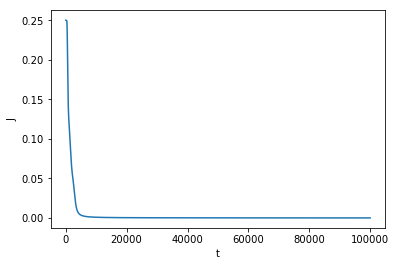

[[ 0.  1.  0.  0.  1.  1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  1.  1.]
 [ 0.  0.  0.  1.  0.  1.  1.  1.]]

[[ 0.91  0.04  0.04  0.04  0.    0.    0.    0.  ]
 [ 1.    0.96  0.96  0.96  0.02  0.02  0.02  0.  ]
 [ 0.    0.    0.    0.    0.1   0.1   0.1   0.86]]

[[ 0.    0.01  0.01  0.01  0.99  0.99  0.99  1.  ]
 [ 0.01  0.99  0.99  0.99  0.01  0.01  0.01  0.99]]



In [13]:
# define the data
X = np.array([[0., 1., 0., 0., 1., 1., 0., 1.],
              [0., 0., 1., 0., 1., 0., 1., 1.],
              [0., 0., 0., 1., 0., 1., 1., 1.]])

Y = np.array([[0., 0., 0., 0., 1., 1., 1., 1.],
              [0., 1., 1., 1., 0., 0., 0., 1.]])


# define hyper parameters
M0, N = X.shape
MC, N = Y.shape

M  = [M0] + [3] + [MC]
C  = len(M) - 1


F  = quad
dF = dquad
g  = [sig,  sig]
dg = [dsig, dsig]

W, b = init_weights(C, M)

epsilon = 1e-7
dW_error, db_error = calc_weight_grads_error(C, M, F, dF, g, dg, X, Y, N, W, b, epsilon)

print_matricies(C, dW_error, 2)

T = 100000
t_step = 10000
alpha = 1

W, b = train(C, N, F, dF, g, dg, X, Y, W, b, alpha, T, t_step)

A, Z = prop_forward(2, g, X, W, b)
print_matricies(C + 1, A, 2)

In [14]:
print_matricies(C, W, 2)
print_matricies(C, b, 2)

[[-5.48 -5.48 -5.48]
 [-6.92 -6.92 -6.92]
 [ 4.04  4.04  4.04]]

[[ -3.09 -10.48   2.89]
 [-11.4   11.91  12.37]]

[[  2.34]
 [ 10.05]
 [-10.32]]

[[ 4.96]
 [-6.13]]



[[ 0.04  0.03 -0.  ]
 [ 0.01 -0.01 -0.02]
 [ 0.01 -0.    0.01]]

[[ 0.    0.01 -0.  ]
 [-0.   -0.09  0.01]]

t =       J =
0         0.499885
1000      0.143061
2000      0.072055
3000      0.008629
4000      0.003238
5000      0.001854
6000      0.001260
7000      0.000939
8000      0.000739
9000      0.000605
10000     0.000509


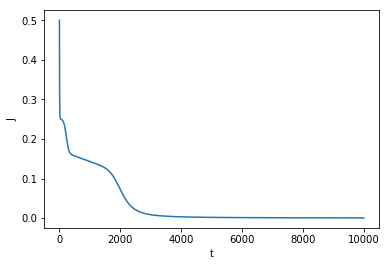

[[ 0.  1.  0.  0.  1.  1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  1.  1.]
 [ 0.  0.  0.  1.  0.  1.  1.  1.]]

[[ 0.84  0.52  0.52  0.52 -0.05 -0.05 -0.05 -0.59]
 [-0.36  0.33  0.35  0.34  0.79  0.79  0.8   0.95]
 [-1.   -0.8  -0.79 -0.79  0.89  0.89  0.9   1.  ]]

[[-0.    0.    0.    0.    0.99  0.99  0.99  0.99]
 [ 0.    0.97  0.97  0.97  0.    0.    0.    0.94]]



In [15]:
# define the data
X = np.array([[0., 1., 0., 0., 1., 1., 0., 1.],
              [0., 0., 1., 0., 1., 0., 1., 1.],
              [0., 0., 0., 1., 0., 1., 1., 1.]])

Y = np.array([[0., 0., 0., 0., 1., 1., 1., 1.],
              [0., 1., 1., 1., 0., 0., 0., 1.]])


# define hyper parameters
M0, N = X.shape
MC, N = Y.shape

M  = [M0] + [3] + [MC]
C  = len(M) - 1


F  = quad
dF = dquad
g  = [tanh,  tanh]
dg = [dtanh, dtanh]

W, b = init_weights(C, M)

epsilon = 1e-7
dW_error, db_error = calc_weight_grads_error(C, M, F, dF, g, dg, X, Y, N, W, b, epsilon)

print_matricies(C, dW_error, 2)

T = 10000
t_step = 1000
alpha = 0.1

W, b = train(C, N, F, dF, g, dg, X, Y, W, b, alpha, T, t_step)

A, Z = prop_forward(2, g, X, W, b)
print_matricies(C + 1, A, 2)

In [16]:
W

[array([[-0.63065687, -0.62684918, -0.62929387],
        [ 0.71884773,  0.73808477,  0.72586269],
        [ 2.5235472 ,  2.53326067,  2.52714088]]),
 array([[ 0.23988472, -0.37746641,  1.66765477],
        [-3.03894697,  2.38154513, -2.87228594]])]

In [17]:
b

[array([[ 1.20597612],
        [-0.37361556],
        [-3.61180881]]), array([[ 1.32894185],
        [ 0.52461551]])]

<h4>Soft max</h4>

\begin{split}
s(Z) &= \frac{\exp(Z_{mn})}{\sum_{i = 1}^M \exp(Z_{in})} \\
\end{split}


<h4>Cross entropy</h4>

\begin{split}
H(Y, B) = - Y . \log(B)
\end{split}

Let us assume that the last layer is a soft max and the cost is cross entropy.  If there were three layers,

\begin{split}
A3_{mn} &= \frac{\exp(Z3_{mn})}{\sum_{i = 1}^{M3} \exp(Z3_{in})} \\
\end{split}

\begin{split}
F(Y, A3) = - Y . \log(A3)
\end{split}

The cost is then

\begin{split}
J &= \frac{1}{N} \sum_{i}^{M3} \sum_{j}^N F(Y_{ij}, A3_{ij}) \\
&= - \frac{1}{N} \sum_{i}^{M3} \sum_{j}^N Y_{ij} \log(A3_{ij}) \\
&= - \frac{1}{N} \sum_{i}^{M3} \sum_{j}^N Y_{ij} \log \left( \frac{\exp(Z3_{ij})}
     {\sum_{i' = 1}^{M3} \exp(Z3_{i'n})} \right) \\
&= - \frac{1}{N} \sum_{i}^{M3} \sum_{j}^N \left(
     Y_{ij} Z3_{ij} - Y_{ij} \log \sum_{i' = 1}^{M3} \exp(Z3_{i'j}) \right) \\
\end{split}

Now the derivative

\begin{split}
\frac{\partial J}{\partial Z3_{mn}}
&= - \frac{1}{N} \sum_{i}^{M3} \sum_{j}^N \left(Y_{ij} \delta_{im}\delta_{jn} - Y_{ij}
     \frac{\sum_{i' = 1}^{M3} \exp(Z3_{i'j})\delta_{i'm}\delta_{jn}}{\sum_{i' = 1}^{M3} \exp(Z3_{i'j})} \right) \\
&= - \frac{1}{N} \sum_{i}^{M3} \sum_{j}^N \left(Y_{ij} \delta_{im}\delta_{jn} - Y_{ij}
     \frac{\exp(Z3_{mj})\delta_{jn}}{\sum_{i' = 1}^{M3} \exp(Z3_{i'j})} \right) \\
&= - \frac{1}{N} \sum_{i}^{M3} \left(Y_{in} \delta_{im} - Y_{in}
     \frac{\exp(Z3_{mn})}{\sum_{i' = 1}^{M3} \exp(Z3_{i'n})} \right) \\
&= - \frac{1}{N} \sum_{i}^{M3} \left(Y_{in} \delta_{im} - Y_{in}
     A3_{mn} \right) \\
&= - \frac{1}{N} \left(Y_{mn} - A3_{mn} \right) \\
\end{split}

where we have assumed $\sum_{i}^{M3} Y_{in} = 1$.  In general we have the simple equation

\begin{split}
\frac{\partial J}{\partial ZC} &= \frac{1}{N} \left(B - Y \right) \\
\end{split}


<h4>Soft max</h4>

\begin{split}
A3_{mn} &= \frac{\exp(Z3_{mn})}{\sum_{i = 1}^M \exp(Z3_{in})} \\
\end{split}

the derivative

\begin{split}
\frac{\partial A3_{mn}}{\partial Z3_{mn}}
&= \frac{\partial}{\partial Z3_{mn}} \frac{\exp(Z3_{mn})}{\sum_{i = 1}^M \exp(Z3_{in})} \\
&= \frac{\exp(Z3_{mn})}{\sum_{i = 1}^M \exp(Z3_{in})}
 - \frac{\exp(Z3_{mn})}{\sum_{i = 1}^M \exp(Z3_{in})}\\
\end{split}

<h4>Soft max</h4>

\begin{split}
s(Z_{mn}) &= \frac{\exp(Z_{mn})}{\sum_{i = 1}^M \exp(Z_{in})} \\
\frac{\partial s(Z_{mn})}{\partial Z_{mn}}
&= \frac{\partial}{\partial Z_{mn}} \frac{\exp(Z_{mn})}{\sum_{i = 1}^M \exp(Z_{in})} \\
&= \frac{\exp(Z_{mn})}{\sum_{i = 1}^M \exp(Z_{in})}
 - \frac{\exp(Z_{mn})\sum_{i = 1}^M \exp(Z_{in})\delta_{im}}{\left(\sum_{i = 1}^M \exp(Z_{in})\right)^2} \\
&= \frac{\exp(Z_{mn})}{\sum_{i = 1}^M \exp(Z_{in})}
 - \frac{\exp(Z_{mn})\exp(Z_{mn})}{\left(\sum_{i = 1}^M \exp(Z_{in})\right)^2} \\
&= s(Z_{mn})(1 - s(Z_{mn}))
\end{split}

In [18]:
Z = np.array([[1,2],[3,4],[5,8]])
Z

array([[1, 2],
       [3, 4],
       [5, 8]])

In [19]:
A = dsoft_max(Z)
A

array([[ 0.01562418,  0.00242236],
       [ 0.10354869,  0.0176206 ],
       [ 0.11544798,  0.01995582]])

\begin{split}
\frac{d}{dx} \log\left(\frac{A(x)}{B(x)}\right)
&= \frac{d}{dx} \left(\log A(x) - \log B(x) \right) \\
&= \frac{A'(x)}{A(x)} - \frac{B'(x)}{B(x)} \\
\end{split}

or

\begin{split}
\frac{d}{dx} \log\left(\frac{A(x)}{B(x)}\right)
&= \frac{B(x)}{A(x)}\frac{d}{dx}\left(\frac{A(x)}{B(x)}\right) \\
&= \frac{B(x)}{A(x)}\frac{A'(x) B(x) - A(x) B'(x)}{B(x)^2} \\
&= \frac{A'(x) B(x) - A(x) B'(x)}{A(x) B(x)} \\
\end{split}

\begin{split}
J &= \frac{1}{N} \sum_{i=1}^M \sum_{j=1}^N F(g(Z_{ij})) \\
\\
\frac{\partial J}{\partial Z_{mn}}
&= \frac{1}{N} \sum_{i=1}^M \sum_{j=1}^N
\frac{\partial F_{ij}}{\partial A_{i'j'}} \frac{\partial A_{i'j'}}{\partial A_{i'j'}}
\end{split}

The functional notation is tricky.

\begin{split}
A_{mn} &= g_{mn}(Z_{11}, ..., Z_{MN}) \\
\\
A_{mn} &= g_{mn}(Z_{11}, ..., Z_{MN})
\end{split}

Functional notation

\begin{split}
y = f(x)
\end{split}

\begin{split}
y = f(x_1, ..., x_M)
\end{split}

\begin{split}
y_n = f_n(x)
\end{split}

\begin{split}
y_n = f_n(x_1, ..., x_M)
\end{split}

now derivatives

\begin{split}
\frac{\partial y}{\partial x} = \frac{\partial f}{\partial x}
\end{split}

\begin{split}
\frac{\partial y}{\partial x_m} = \frac{\partial f}{\partial x_m}
\end{split}


\begin{split}
J &= \sum_{i=1}^M F(A_i) \\
&= \sum_{i=1}^M F(A_i(Z_1, ..., Z_M)) \\
\\
\frac{\partial J}{\partial Z_m}
&= \sum_{i=1}^M \frac{\partial}{\partial Z_m} F(A_i(Z_1, ..., Z_M)) \\
&= \sum_{i=1}^M \frac{\partial F}{\partial A_i} \frac{\partial A_i}{\partial Z_m} \\
\end{split}

Functional notation, which is tricky. 

Let us say that we have $M$ different varibles $x_m$ and a single function.

\begin{split}
y_n = f_n(x)
\end{split}

\begin{split}
y_n = f_n(x_1, ..., x_M)
\end{split}



Let us say we have $M$ different $x_m$ variables.

Let us say we have $N$ different $y_n = f_n(x_1, ..., x_M)$ variables.

Let us say we have $L$ different $z_l = g_l(y_1, ..., y_N)$ variables.

Let us consider derivatives.

\begin{split}
\frac{\partial z_l}{\partial x_m}
&= \frac{\partial}{\partial x_m} g_l(y_1, ..., y_N) \\
&= \sum_{j=1}^N \frac{\partial g_l}{\partial y_j} \frac{\partial f_j}{\partial x_m}
\end{split}





\begin{split}
J = \frac{1}{N} \sum_{i=1}^M \sum_{j=1}^N
\end{split}